# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_names = []
lat = []
lng = []
max_temp = []
hum = []
cld_prc = []
ws = []
country = []
date = []
record_num = 1
set_num = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

for city in cities:
    query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
    
    try:
        print(f"Processing Record {record_num} of Set {set_num} | {city}")
        
        response = requests.get(query_url + city).json()
        
        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cld_prc.append(response['clouds']['all'])
        ws.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
                
        if record_num == 49:
            record_num = 1
            set_num += 1
        else:         
            record_num += 1
            
    except:
        print(f"City not found. Skipping...")
        if record_num == 49:
            record_num = 1
            set_num += 1
        else:         
            record_num += 1
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")   

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | dengzhou
Processing Record 7 of Set 1 | labuhan
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | acari
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | olga
Processing Record 18 of Set 1 | rennes
Processing Record 19 of Set 1 | matay
Processing Record 20 of Set 1 | manokwari
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame(list(zip(city_names, lat, lng, max_temp, hum, cld_prc, ws, country, date)), columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,57.31,86,75,17.27,US,1663870445
1,Norman Wells,65.2820,-126.8329,44.64,87,75,2.30,CA,1663870568
2,Vaini,-21.2000,-175.2000,75.56,87,91,17.11,TO,1663870590
3,Kapaa,22.0752,-159.3190,75.34,91,75,5.75,US,1663870615
4,Dengzhou,37.8086,120.7508,64.62,45,39,24.09,CN,1663870794
...,...,...,...,...,...,...,...,...,...
570,Namatanai,-3.6667,152.4333,77.16,79,52,3.58,PG,1663871082
571,Kamenka,51.3223,42.7678,57.52,96,100,3.40,RU,1663871082
572,Neijiang,29.5835,105.0622,65.70,93,100,7.94,CN,1663871083
573,Stornoway,58.2093,-6.3865,53.04,86,40,8.05,GB,1663871083


In [7]:
df.to_csv("../output_data/city_weather_data.csv")

In [8]:
summary_df = df[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country"]].describe()
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,20.018939,24.202807,64.797130,70.066087,58.504348,8.148191
std,33.754646,91.367487,17.053544,23.394641,37.767115,5.764587
min,-54.800000,-175.200000,17.350000,6.000000,0.000000,0.000000
25%,-7.944300,-58.693500,51.960000,55.500000,20.000000,3.990000
50%,24.144700,29.250000,66.520000,77.000000,75.000000,6.620000
75%,48.879650,108.430400,77.280000,89.000000,96.000000,11.220000
max,78.218600,178.416700,105.350000,100.000000,100.000000,40.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
over100 = 0
hum_list = df["Humidity"].tolist()
for i in hum_list:
    if i > 100:
        over100 += 1
over100

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

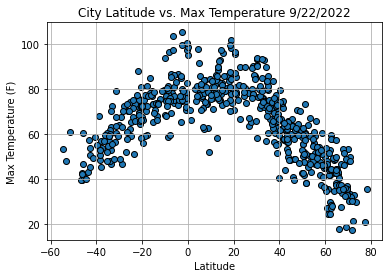

In [28]:
plt.scatter(df["Lat"], df["Max Temp"], edgecolors="black")
plt.title("City Latitude vs. Max Temperature 9/22/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.savefig("../output_data/lat_temp.png")

plt.show()

In [1]:
#Relationship between latitude and max temp on 9/22/2022. Temps go up the closer lat gets to 0 (the equator).

## Latitude vs. Humidity Plot

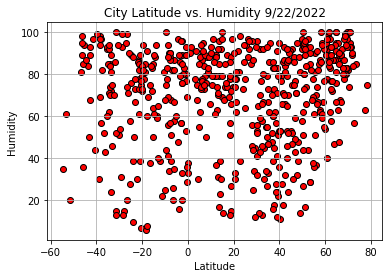

In [29]:
plt.scatter(df["Lat"], df["Humidity"], c="red", edgecolors="black")
plt.title("City Latitude vs. Humidity 9/22/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid()
plt.savefig("../output_data/lat_hum.png")

plt.show()

In [2]:
#Relationship between latitude and humidity on 9/22/2022. No relation.

## Latitude vs. Cloudiness Plot

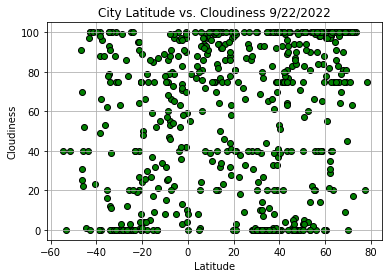

In [30]:
plt.scatter(df["Lat"], df["Cloudiness"], c="green", edgecolors="black")
plt.title("City Latitude vs. Cloudiness 9/22/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid()
plt.savefig("../output_data/lat_cld.png")

plt.show()

In [3]:
#Relationship between latitude and cloudiness on 9/22/2022. No relation.

## Latitude vs. Wind Speed Plot

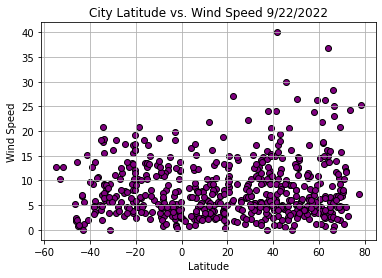

In [31]:
plt.scatter(df["Lat"], df["Wind Speed"], c="purple", edgecolors="black")
plt.title("City Latitude vs. Wind Speed 9/22/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid()
plt.savefig("../output_data/lat_ws.png")

plt.show()

In [4]:
#Relationship between latitude and windspeed on 9/22/2022. No relation.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8338381791896919


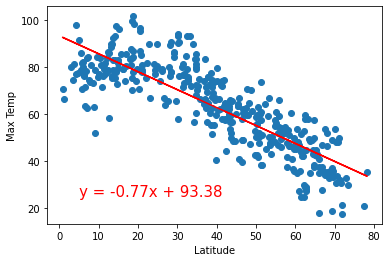

In [36]:
n_df = df.loc[df["Lat"] >= 0]

x = n_df["Lat"]
y = n_df["Max Temp"]

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/n_lat_temp.png")
plt.show()

In [5]:
#As latitude increases in the northern hemisphere, temperatures goes down. This is a relatively strong correlation based on the absolute value of r being close to 1 (perfect correlation).

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7960641857703358


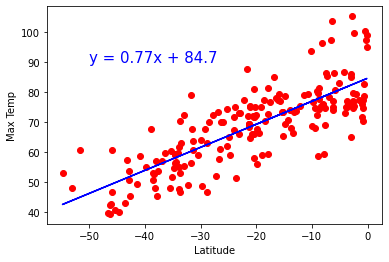

In [41]:
s_df = df.loc[df["Lat"] < 0]

x = s_df["Lat"]
y = s_df["Max Temp"]

plt.scatter(x, y, c="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values, c="blue")
plt.annotate(line_eq,(-50, 90),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/s_lat_temp.png")
plt.show()

In [6]:
#As latitude increases in the southern hemisphere, temperatures goes up. This is a relatively strong correlation based on the absolute value of r being close to 1 (perfect correlation).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1454995630688393


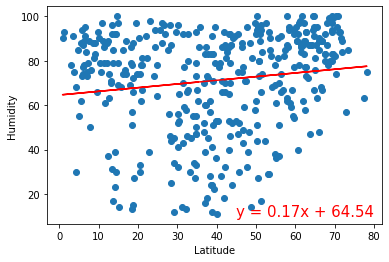

In [48]:
x = n_df["Lat"]
y = n_df["Humidity"]

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/n_lat_hum.png")
plt.show()

In [7]:
#No correlation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.07952861924949506


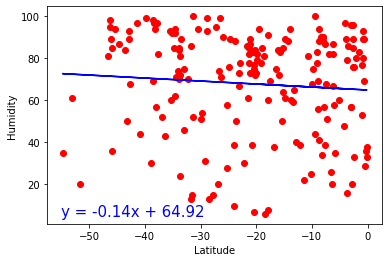

In [52]:
x = s_df["Lat"]
y = s_df["Humidity"]

plt.scatter(x, y, c="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values, c="blue")
plt.annotate(line_eq,(-55, 5),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/s_lat_hum.png")
plt.show()

In [8]:
#No correlation between latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10065432007442286


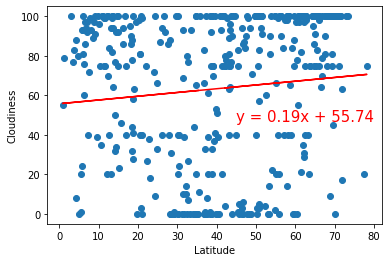

In [56]:
x = n_df["Lat"]
y = n_df["Cloudiness"]

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,47),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/n_lat_cld.png")
plt.show()

In [11]:
#No correlation between latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08426157471714443


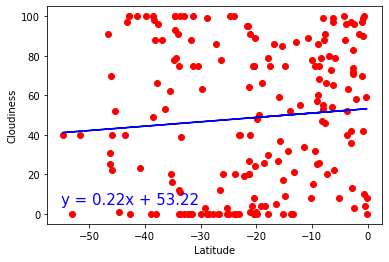

In [57]:
x = s_df["Lat"]
y = s_df["Cloudiness"]

plt.scatter(x, y, c="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values, c="blue")
plt.annotate(line_eq,(-55, 5),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/s_lat_cld.png")
plt.show()

In [10]:
#No correlation between latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1210398426655756


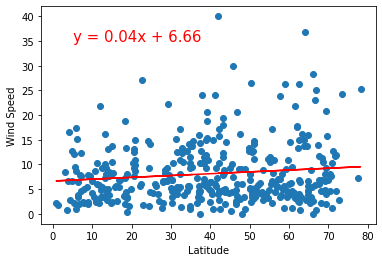

In [59]:
x = n_df["Lat"]
y = n_df["Wind Speed"]

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/n_lat_ws.png")
plt.show()

In [9]:
#No correlation between latitude and windspeed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.03019366214592873


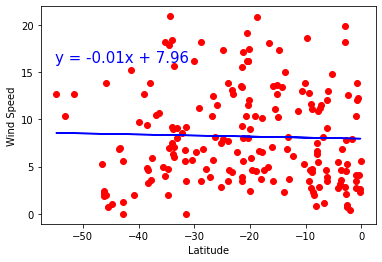

In [63]:
x = s_df["Lat"]
y = s_df["Wind Speed"]

plt.scatter(x, y, c="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values, c="blue")
plt.annotate(line_eq,(-55, 16),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/s_lat_ws.png")
plt.show()

In [ ]:
#No correlation between latitude and windspeed in the southern hemisphere.

In [ ]:
#Three obserable trends:
#    1) In the northern hemisphere, latitude and temperature are negatively correlated, but in the southern hemisphere the same measurements are positively correlated.
#       This is due to 0 latitude being the equator and temperatures are higher the nearer one is.
#    2) None of the other comparisons with latitude show a correlation (humidity, windspeed, cloudiness). I anticipated humidity to be higher where the max temp is high,
#       but this was not the case.
#    3) Percipitation was not a gathered statistic in this example, but could show correlation with latitude and would fit nicely with this dataset.